In [2]:
import os
import pandas as pd
import csv
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from pysr import pysr, best
from pysr import PySRRegressor
import natsort

# colorblind-friendly colors
CB_palette = ['#377eb8', '#ff7f00', '#4daf4a',
                '#f781bf', '#a65628', '#984ea3',
                '#999999', '#e41a1c', '#dede00']

Detected Jupyter notebook. Loading juliacall extension. Set `PYSR_AUTOLOAD_EXTENSIONS=no` to disable.


## Load data

In [11]:
os.chdir("/Users/antoine/Harvard/IAC/NinaKozlova/20240119_SW1990_pNDRG1/Results/spatial_data/20240321_sigma10")

# Specify the columns you want to load
columns_to_load = ['Class', 'pNDRG1_647: Cell: MedianTotalIntensity', 'pNDRG1_647: Cell: Median', 'Signed distance to annotation Stroma µm']

# Read and filter each CSV file
dfs_ker488_pndrg1_647 = []
dfs_ker488 = []
dfs = []

file_paths = []
for i in [1, 2, 3, 4, 5, 11, 14, 15]:
    file_name = f'SW shC Dox GEM  #{i}.vsi - 20x_DAPI, FITC, TRITC, CY5_01.csv'
    file_paths.append(file_name)

# Sort file paths naturally
file_paths = natsort.natsorted(file_paths)

for file_path in file_paths:
    df = pd.read_csv(file_path, usecols=columns_to_load)
    df_ker488_pndrg1_647 = df[df['Class'] == 'KER_488: pNDRG1_647']  # Filter rows by 'Class' for KER_488: pNDRG1_647
    df_ker488 = df[df['Class'] == 'KER_488']  # Filter rows by 'Class' for KER_488
    df = df[(df['Class'] == 'KER_488') | (df['Class'] == 'KER_488: pNDRG1_647')]  # Filter rows by 'Class' for KER_488
    dfs_ker488_pndrg1_647.append(df_ker488_pndrg1_647)
    dfs_ker488.append(df_ker488)
    dfs.append(df)

# Concatenate all filtered datasets
ker488_pndrg1_647_data = pd.concat(dfs_ker488_pndrg1_647, ignore_index=True)
ker488_data = pd.concat(dfs_ker488, ignore_index=True)
all_data = pd.concat(dfs, ignore_index=True)

## Scatterplot, medians not bootstrapped

## Medians

/var/folders/3b/6sb_mkrj5jz7x94kf6pw1vmw0000gq/T/ipykernel_20708/2419789318.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_intensity_1 = ker488_pndrg1_647_data.groupby(distance_bins_1)['pNDRG1_647: Cell: MedianTotalIntensity'].median()
/var/folders/3b/6sb_mkrj5jz7x94kf6pw1vmw0000gq/T/ipykernel_20708/2419789318.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  num_data_points_1 = ker488_pndrg1_647_data.groupby(distance_bins_1).size()
/var/folders/3b/6sb_mkrj5jz7x94kf6pw1vmw0000gq/T/ipykernel_20708/2419789318.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to

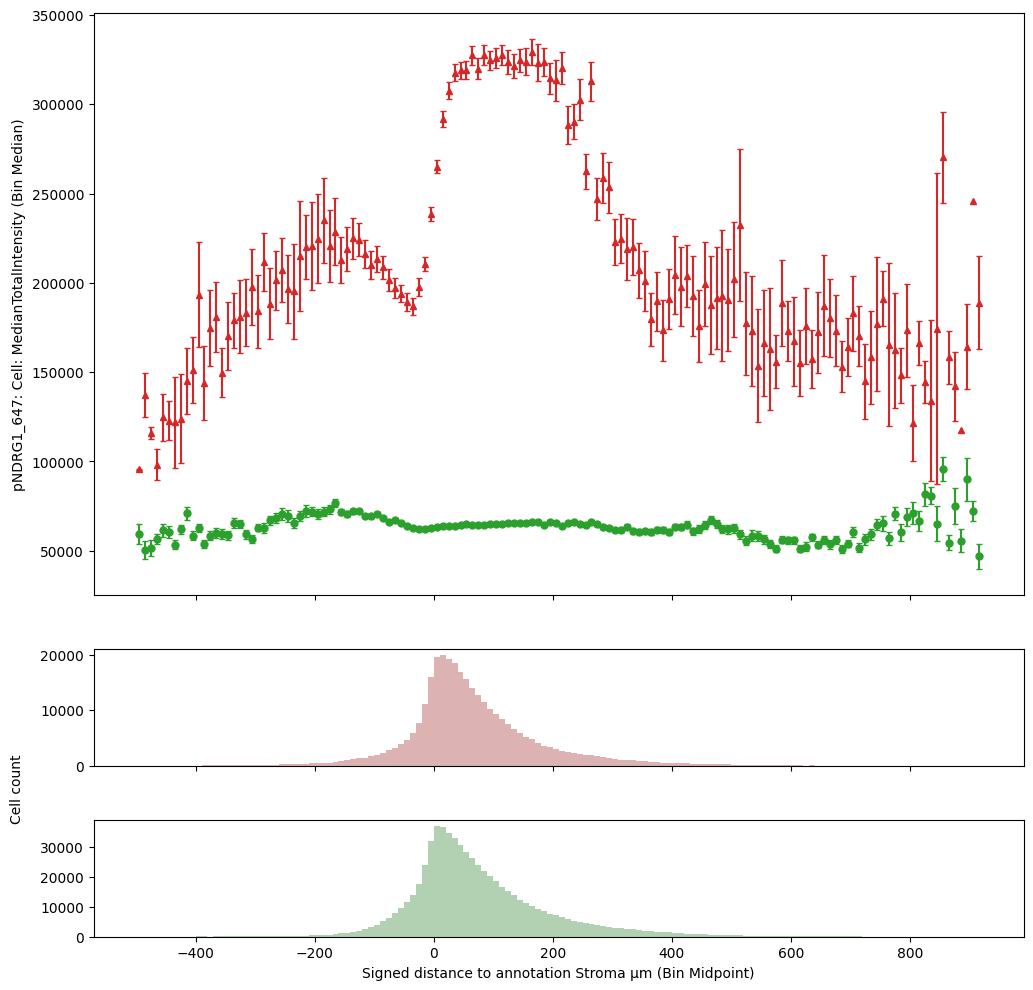

In [4]:
# Define bin size and create distance bins for the first set of data
bin_size = 10
min_dist = int(np.min(ker488_pndrg1_647_data['Signed distance to annotation Stroma µm']))
max_dist = int(np.max(ker488_pndrg1_647_data['Signed distance to annotation Stroma µm']))
distance_bins_1 = pd.cut(ker488_pndrg1_647_data['Signed distance to annotation Stroma µm'], bins=range(min_dist, max_dist, bin_size), right=False)

# Calculate median intensity for each distance bin for the first set of data
median_intensity_1 = ker488_pndrg1_647_data.groupby(distance_bins_1)['pNDRG1_647: Cell: MedianTotalIntensity'].median()

# Calculate number of data points for each distance bin for the first set of data
num_data_points_1 = ker488_pndrg1_647_data.groupby(distance_bins_1).size()

# Calculate standard error for each distance bin for the first set of data
std_error_1 = ker488_pndrg1_647_data.groupby(distance_bins_1)['pNDRG1_647: Cell: MedianTotalIntensity'].sem()

# Calculate bin midpoints for the first set of data
bin_midpoints_1 = [(bin.left + bin.right) / 2 for bin in distance_bins_1.cat.categories]

# Plotting the first set of data
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True, gridspec_kw={'height_ratios': [5, 1, 1]}, figsize=(12, 12))

color = 'tab:red'
ax1.set_ylabel('pNDRG1_647: Cell: MedianTotalIntensity (Bin Median)', color='black')
ax1.errorbar(bin_midpoints_1, median_intensity_1.values, yerr=std_error_1, fmt='^', markersize=5, color=color, ecolor=color, capsize=2)

# Create another y-axis for the number of data points
ax2.set_ylabel('Cell count', color='black')
ax2.yaxis.set_label_coords(-0.075, -0.2)
ax2.bar(bin_midpoints_1, num_data_points_1.values, color='darkred', width=bin_size, align='center', alpha=0.3)

# Define bin size and create distance bins for the second set of data
distance_bins_2 = pd.cut(ker488_data['Signed distance to annotation Stroma µm'], bins=range(min_dist, max_dist, bin_size), right=False)

# Calculate median intensity for each distance bin for the second set of data
median_intensity_2 = ker488_data.groupby(distance_bins_2)['pNDRG1_647: Cell: MedianTotalIntensity'].median()

# Calculate number of data points for each distance bin for the second set of data
num_data_points_2 = ker488_data.groupby(distance_bins_2).size()

# Calculate standard error for each distance bin for the second set of data
std_error_2 = ker488_data.groupby(distance_bins_2)['pNDRG1_647: Cell: MedianTotalIntensity'].sem()

# Calculate bin midpoints for the second set of data
bin_midpoints_2 = [(bin.left + bin.right) / 2 for bin in distance_bins_2.cat.categories]

# Plotting the second set of data
color = 'tab:green'
ax1.errorbar(bin_midpoints_2, median_intensity_2.values, yerr=std_error_2, fmt='o', color=color, markersize=5, ecolor=color, capsize=2, zorder=1)

ax3.bar(bin_midpoints_2, num_data_points_2.values, color='darkgreen', width=bin_size, align='center', alpha=0.3)

plt.xlabel('Signed distance to annotation Stroma µm (Bin Midpoint)')
#plt.xlim([-200, 500])

plt.show()


## Means

/var/folders/3b/6sb_mkrj5jz7x94kf6pw1vmw0000gq/T/ipykernel_89864/2547690859.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_intensity_1 = ker488_pndrg1_647_data.groupby(distance_bins_1)['pNDRG1_647: Cell: MedianTotalIntensity'].mean()
/var/folders/3b/6sb_mkrj5jz7x94kf6pw1vmw0000gq/T/ipykernel_89864/2547690859.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  num_data_points_1 = ker488_pndrg1_647_data.groupby(distance_bins_1).size()
/var/folders/3b/6sb_mkrj5jz7x94kf6pw1vmw0000gq/T/ipykernel_89864/2547690859.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to 

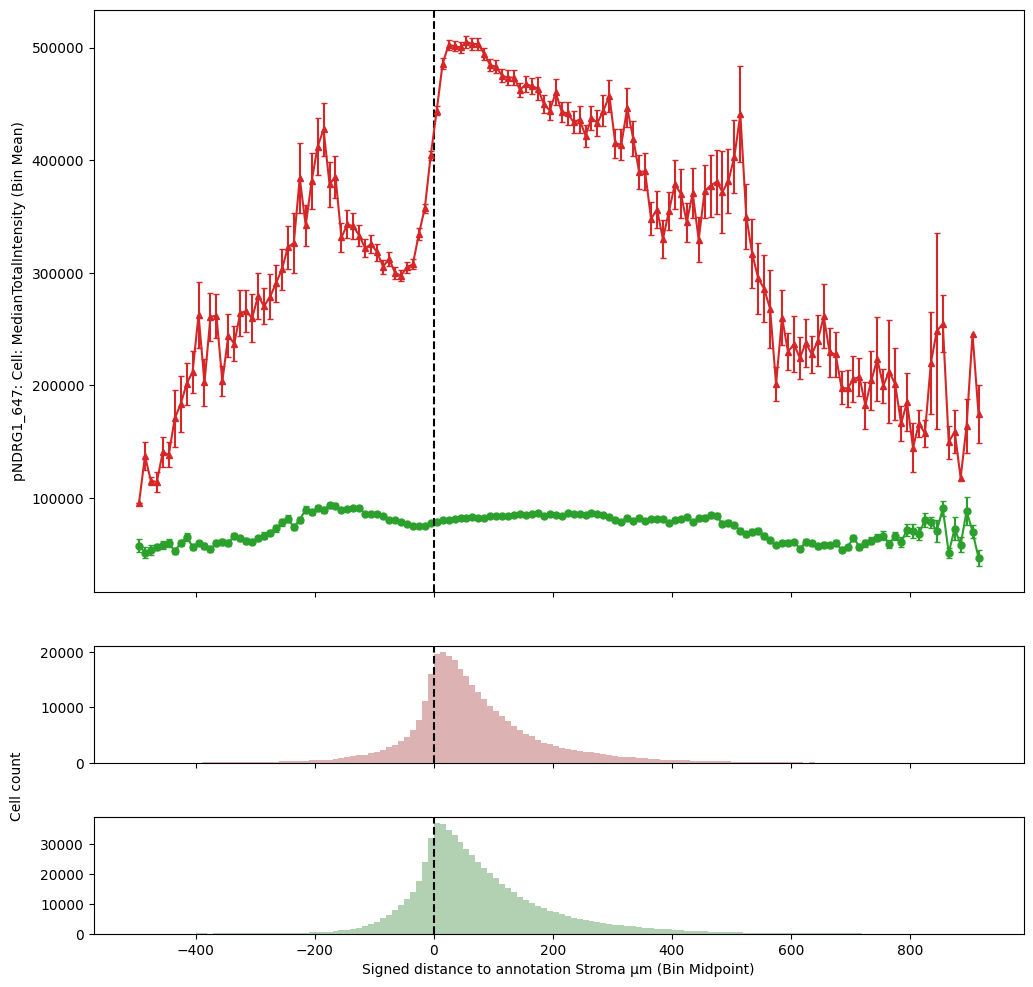

In [170]:
import pandas as pd
import matplotlib.pyplot as plt

# Define bin size and create distance bins for the first set of data
bin_size = 10
min_dist = int(np.min(ker488_pndrg1_647_data['Signed distance to annotation Stroma µm']))
max_dist = int(np.max(ker488_pndrg1_647_data['Signed distance to annotation Stroma µm']))
distance_bins_1 = pd.cut(ker488_pndrg1_647_data['Signed distance to annotation Stroma µm'], bins=range(min_dist, max_dist, bin_size), right=False)

# Calculate median intensity for each distance bin for the first set of data
median_intensity_1 = ker488_pndrg1_647_data.groupby(distance_bins_1)['pNDRG1_647: Cell: MedianTotalIntensity'].mean()

# Calculate number of data points for each distance bin for the first set of data
num_data_points_1 = ker488_pndrg1_647_data.groupby(distance_bins_1).size()

# Calculate standard error for each distance bin for the first set of data
std_error_1 = ker488_pndrg1_647_data.groupby(distance_bins_1)['pNDRG1_647: Cell: MedianTotalIntensity'].sem()

# Calculate bin midpoints for the first set of data
bin_midpoints_1 = [(bin.left + bin.right) / 2 for bin in distance_bins_1.cat.categories]

# Plotting the first set of data
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True, gridspec_kw={'height_ratios': [5, 1, 1]}, figsize=(12, 12))

color = 'tab:red'
ax1.set_ylabel('pNDRG1_647: Cell: MedianTotalIntensity (Bin Mean)', color='black')
ax1.errorbar(bin_midpoints_1, median_intensity_1.values, yerr=std_error_1, fmt='-^', markersize=5, color=color, ecolor=color, capsize=2)
ax1.axvline(x=0, ls='--', color='black')

# Create another y-axis for the number of data points
ax2.set_ylabel('Cell count', color='black')
ax2.yaxis.set_label_coords(-0.075, -0.2)
ax2.bar(bin_midpoints_1, num_data_points_1.values, color='darkred', width=bin_size, align='center', alpha=0.3)
ax2.axvline(x=0, ls='--', color='black')

# Define bin size and create distance bins for the second set of data
distance_bins_2 = pd.cut(ker488_data['Signed distance to annotation Stroma µm'], bins=range(min_dist, max_dist, bin_size), right=False)

# Calculate median intensity for each distance bin for the second set of data
median_intensity_2 = ker488_data.groupby(distance_bins_2)['pNDRG1_647: Cell: MedianTotalIntensity'].mean()

# Calculate number of data points for each distance bin for the second set of data
num_data_points_2 = ker488_data.groupby(distance_bins_2).size()

# Calculate standard error for each distance bin for the second set of data
std_error_2 = ker488_data.groupby(distance_bins_2)['pNDRG1_647: Cell: MedianTotalIntensity'].sem()

# Calculate bin midpoints for the second set of data
bin_midpoints_2 = [(bin.left + bin.right) / 2 for bin in distance_bins_2.cat.categories]

#ax1bis = ax1.twinx()
#ax1bis.set_ylabel("pNDRG1_647: Cell: MedianTotalIntensity", color='green')
#ax1.set_ylabel("Mean pNDRG1_647: Cell: MedianTotalIntensity")

# Plotting the second set of data
color = 'tab:green'
ax1.errorbar(bin_midpoints_2, median_intensity_2.values, yerr=std_error_2, fmt='-o', color=color, markersize=5, ecolor=color, capsize=2, zorder=1)

ax3.bar(bin_midpoints_2, num_data_points_2.values, color='darkgreen', width=bin_size, align='center', alpha=0.3)
ax3.axvline(x=0, ls='--', color='black')

plt.xlabel('Signed distance to annotation Stroma µm (Bin Midpoint)')
#plt.xlim([-250, 1000])

plt.savefig("/Users/antoine/Harvard/IAC/NinaKozlova/20240119_SW1990_pNDRG1/Results/plots/spatial_analysis/20240321_full_spatial_mean.png", dpi=300)
plt.show()


/var/folders/3b/6sb_mkrj5jz7x94kf6pw1vmw0000gq/T/ipykernel_89864/1254932886.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_intensity_1 = ker488_pndrg1_647_data.groupby(distance_bins_1)['pNDRG1_647: Cell: MedianTotalIntensity'].mean()
/var/folders/3b/6sb_mkrj5jz7x94kf6pw1vmw0000gq/T/ipykernel_89864/1254932886.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  num_data_points_1 = ker488_pndrg1_647_data.groupby(distance_bins_1).size()
/var/folders/3b/6sb_mkrj5jz7x94kf6pw1vmw0000gq/T/ipykernel_89864/1254932886.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to 

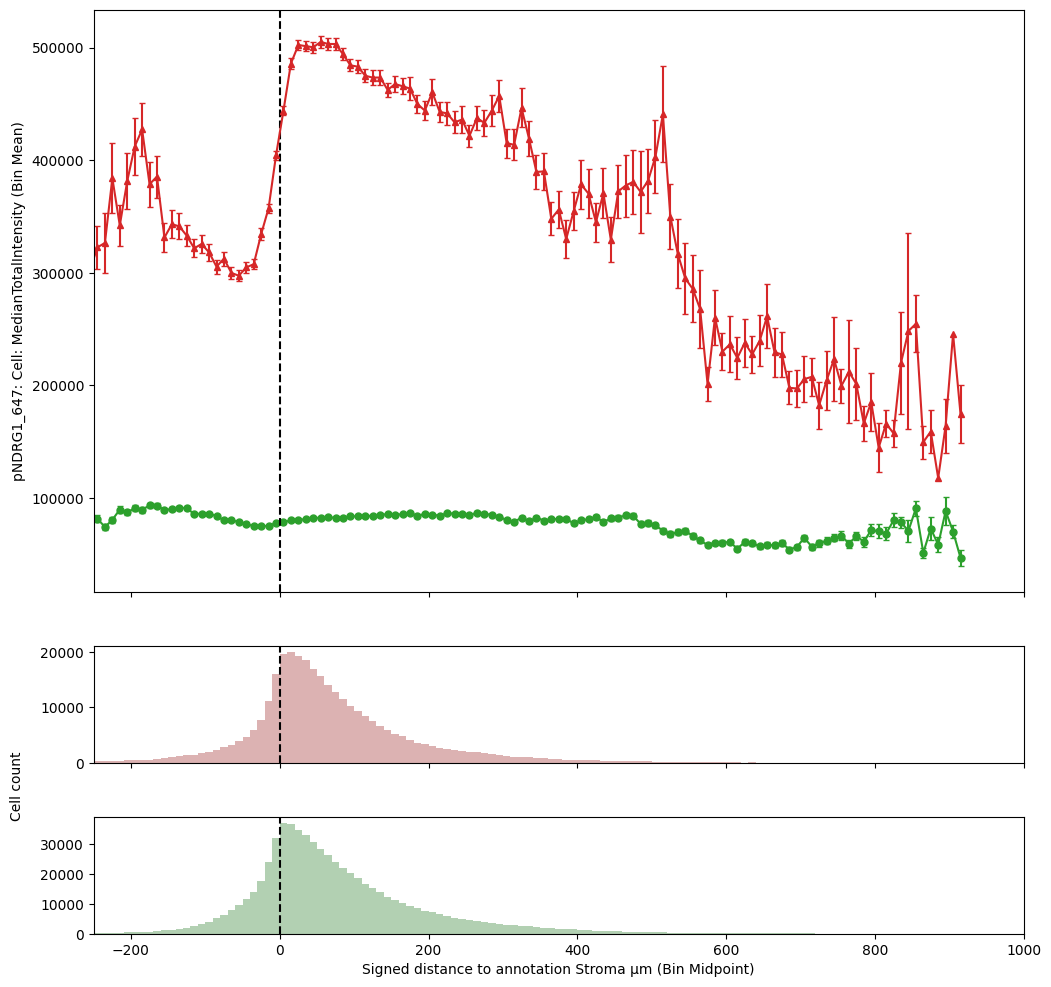

In [171]:
import pandas as pd
import matplotlib.pyplot as plt

# Define bin size and create distance bins for the first set of data
bin_size = 10
min_dist = int(np.min(ker488_pndrg1_647_data['Signed distance to annotation Stroma µm']))
max_dist = int(np.max(ker488_pndrg1_647_data['Signed distance to annotation Stroma µm']))
distance_bins_1 = pd.cut(ker488_pndrg1_647_data['Signed distance to annotation Stroma µm'], bins=range(min_dist, max_dist, bin_size), right=False)

# Calculate median intensity for each distance bin for the first set of data
median_intensity_1 = ker488_pndrg1_647_data.groupby(distance_bins_1)['pNDRG1_647: Cell: MedianTotalIntensity'].mean()

# Calculate number of data points for each distance bin for the first set of data
num_data_points_1 = ker488_pndrg1_647_data.groupby(distance_bins_1).size()

# Calculate standard error for each distance bin for the first set of data
std_error_1 = ker488_pndrg1_647_data.groupby(distance_bins_1)['pNDRG1_647: Cell: MedianTotalIntensity'].sem()

# Calculate bin midpoints for the first set of data
bin_midpoints_1 = [(bin.left + bin.right) / 2 for bin in distance_bins_1.cat.categories]

# Plotting the first set of data
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True, gridspec_kw={'height_ratios': [5, 1, 1]}, figsize=(12, 12))

color = 'tab:red'
ax1.set_ylabel('pNDRG1_647: Cell: MedianTotalIntensity (Bin Mean)', color='black')
ax1.errorbar(bin_midpoints_1, median_intensity_1.values, yerr=std_error_1, fmt='-^', markersize=5, color=color, ecolor=color, capsize=2)
ax1.axvline(x=0, ls='--', color='black')

# Create another y-axis for the number of data points
ax2.set_ylabel('Cell count', color='black')
ax2.yaxis.set_label_coords(-0.075, -0.2)
ax2.bar(bin_midpoints_1, num_data_points_1.values, color='darkred', width=bin_size, align='center', alpha=0.3)
ax2.axvline(x=0, ls='--', color='black')

# Define bin size and create distance bins for the second set of data
distance_bins_2 = pd.cut(ker488_data['Signed distance to annotation Stroma µm'], bins=range(min_dist, max_dist, bin_size), right=False)

# Calculate median intensity for each distance bin for the second set of data
median_intensity_2 = ker488_data.groupby(distance_bins_2)['pNDRG1_647: Cell: MedianTotalIntensity'].mean()

# Calculate number of data points for each distance bin for the second set of data
num_data_points_2 = ker488_data.groupby(distance_bins_2).size()

# Calculate standard error for each distance bin for the second set of data
std_error_2 = ker488_data.groupby(distance_bins_2)['pNDRG1_647: Cell: MedianTotalIntensity'].sem()

# Calculate bin midpoints for the second set of data
bin_midpoints_2 = [(bin.left + bin.right) / 2 for bin in distance_bins_2.cat.categories]

#ax1bis = ax1.twinx()
#ax1bis.set_ylabel("pNDRG1_647: Cell: MedianTotalIntensity", color='green')
#ax1.set_ylabel("Mean pNDRG1_647: Cell: MedianTotalIntensity")

# Plotting the second set of data
color = 'tab:green'
ax1.errorbar(bin_midpoints_2, median_intensity_2.values, yerr=std_error_2, fmt='-o', color=color, markersize=5, ecolor=color, capsize=2, zorder=1)

ax3.bar(bin_midpoints_2, num_data_points_2.values, color='darkgreen', width=bin_size, align='center', alpha=0.3)
ax3.axvline(x=0, ls='--', color='black')

plt.xlabel('Signed distance to annotation Stroma µm (Bin Midpoint)')
plt.xlim([-250, 1000])

plt.savefig("/Users/antoine/Harvard/IAC/NinaKozlova/20240119_SW1990_pNDRG1/Results/plots/spatial_analysis/20240321_zoomed_spatial_mean.png", dpi=300)
plt.show()


/var/folders/3b/6sb_mkrj5jz7x94kf6pw1vmw0000gq/T/ipykernel_89864/1022577767.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_intensity_1 = ker488_pndrg1_647_data.groupby(distance_bins_1)['pNDRG1_647: Cell: MedianTotalIntensity'].mean()
/var/folders/3b/6sb_mkrj5jz7x94kf6pw1vmw0000gq/T/ipykernel_89864/1022577767.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  num_data_points_1 = ker488_pndrg1_647_data.groupby(distance_bins_1).size()
/var/folders/3b/6sb_mkrj5jz7x94kf6pw1vmw0000gq/T/ipykernel_89864/1022577767.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to 

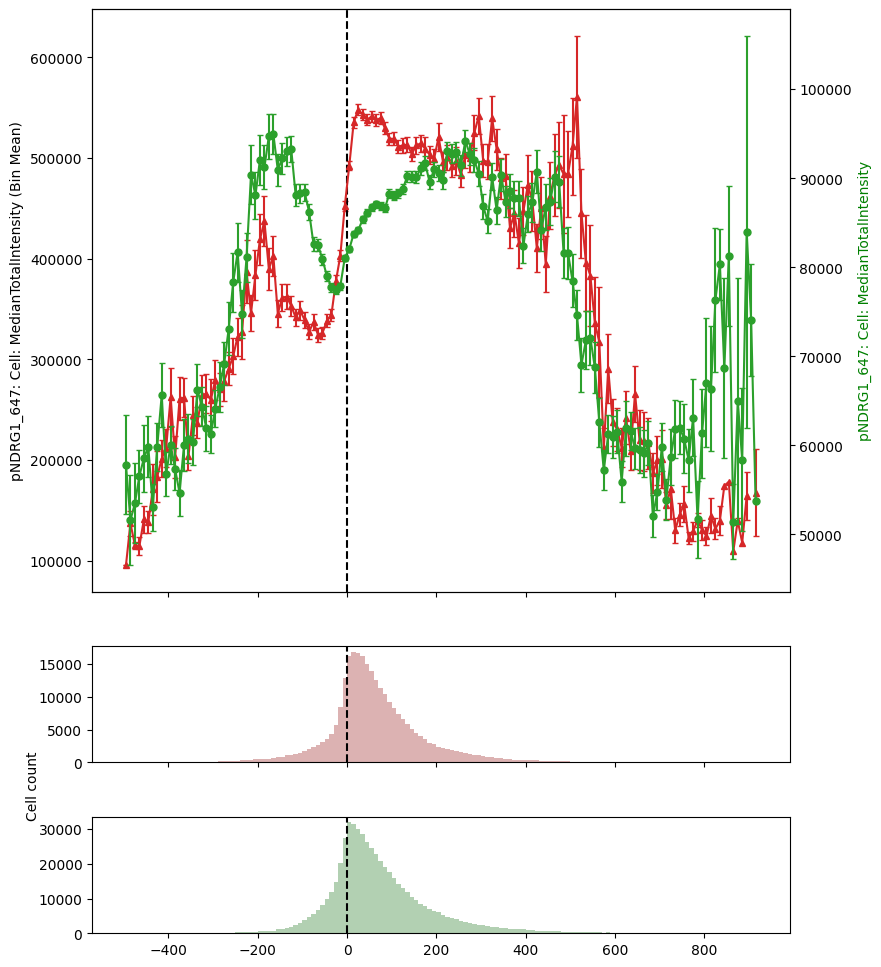

In [108]:
import pandas as pd
import matplotlib.pyplot as plt

# Define bin size and create distance bins for the first set of data
bin_size = 10
min_dist = int(np.min(ker488_pndrg1_647_data['Signed distance to annotation Stroma µm']))
max_dist = int(np.max(ker488_pndrg1_647_data['Signed distance to annotation Stroma µm']))
distance_bins_1 = pd.cut(ker488_pndrg1_647_data['Signed distance to annotation Stroma µm'], bins=range(min_dist, max_dist, bin_size), right=False)

# Calculate median intensity for each distance bin for the first set of data
median_intensity_1 = ker488_pndrg1_647_data.groupby(distance_bins_1)['pNDRG1_647: Cell: MedianTotalIntensity'].mean()

# Calculate number of data points for each distance bin for the first set of data
num_data_points_1 = ker488_pndrg1_647_data.groupby(distance_bins_1).size()

# Calculate standard error for each distance bin for the first set of data
std_error_1 = ker488_pndrg1_647_data.groupby(distance_bins_1)['pNDRG1_647: Cell: MedianTotalIntensity'].sem()

# Calculate bin midpoints for the first set of data
bin_midpoints_1 = [(bin.left + bin.right) / 2 for bin in distance_bins_1.cat.categories]

# Plotting the first set of data
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True, gridspec_kw={'height_ratios': [5, 1, 1]}, figsize=(9, 12))

color = 'tab:red'
ax1.set_ylabel('pNDRG1_647: Cell: MedianTotalIntensity (Bin Mean)', color='black')
ax1.errorbar(bin_midpoints_1, median_intensity_1.values, yerr=std_error_1, fmt='-^', markersize=5, color=color, ecolor=color, capsize=2)
ax1.axvline(x=0, ls='--', color='black')

# Create another y-axis for the number of data points
ax2.set_ylabel('Cell count', color='black')
ax2.yaxis.set_label_coords(-0.075, -0.2)
ax2.bar(bin_midpoints_1, num_data_points_1.values, color='darkred', width=bin_size, align='center', alpha=0.3)
ax2.axvline(x=0, ls='--', color='black')

# Define bin size and create distance bins for the second set of data
distance_bins_2 = pd.cut(ker488_data['Signed distance to annotation Stroma µm'], bins=range(min_dist, max_dist, bin_size), right=False)

# Calculate median intensity for each distance bin for the second set of data
median_intensity_2 = ker488_data.groupby(distance_bins_2)['pNDRG1_647: Cell: MedianTotalIntensity'].mean()

# Calculate number of data points for each distance bin for the second set of data
num_data_points_2 = ker488_data.groupby(distance_bins_2).size()

# Calculate standard error for each distance bin for the second set of data
std_error_2 = ker488_data.groupby(distance_bins_2)['pNDRG1_647: Cell: MedianTotalIntensity'].sem()

# Calculate bin midpoints for the second set of data
bin_midpoints_2 = [(bin.left + bin.right) / 2 for bin in distance_bins_2.cat.categories]

ax1bis = ax1.twinx()
ax1bis.set_ylabel("pNDRG1_647: Cell: MedianTotalIntensity", color='green')

# Plotting the second set of data
color = 'tab:green'
ax1bis.errorbar(bin_midpoints_2, median_intensity_2.values, yerr=std_error_2, fmt='-o', color=color, markersize=5, ecolor=color, capsize=2, zorder=1)

ax3.bar(bin_midpoints_2, num_data_points_2.values, color='darkgreen', width=bin_size, align='center', alpha=0.3)
ax3.axvline(x=0, ls='--', color='black')

plt.xlabel('Signed distance to annotation Stroma µm (Bin Midpoint)')
#plt.xlim([-250, 1000])

plt.savefig("/Users/antoine/Harvard/IAC/NinaKozlova/20240119_SW1990_pNDRG1/Results/plots/spatial_analysis/20240321/full_scaled_spatial_mean.png", dpi=300)
plt.show()


## Difference of intensity between the two cell types

/var/folders/3b/6sb_mkrj5jz7x94kf6pw1vmw0000gq/T/ipykernel_20708/4049356768.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_intensity_1 = ker488_pndrg1_647_data.groupby(distance_bins_1)['pNDRG1_647: Cell: MedianTotalIntensity'].median()
/var/folders/3b/6sb_mkrj5jz7x94kf6pw1vmw0000gq/T/ipykernel_20708/4049356768.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  std_error_1 = ker488_pndrg1_647_data.groupby(distance_bins_1)['pNDRG1_647: Cell: MedianTotalIntensity'].sem()
/var/folders/3b/6sb_mkrj5jz7x94kf6pw1vmw0000gq/T/ipykernel_20708/4049356768.py:23: FutureWarning: The default of observed=False 

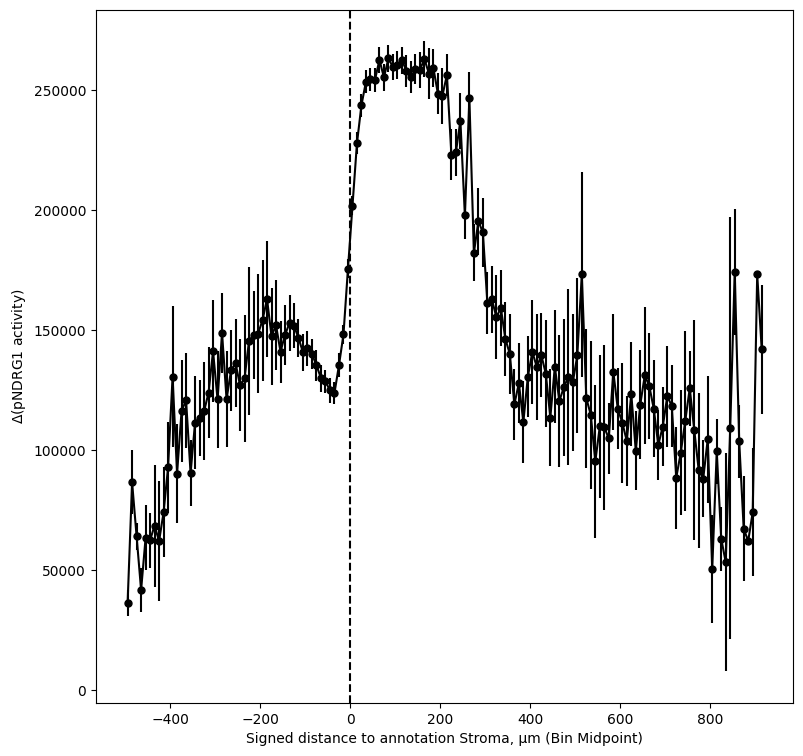

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Define bin size and create distance bins for the first set of data
bin_size = 10
min_dist = int(np.min(ker488_pndrg1_647_data['Signed distance to annotation Stroma µm']))
max_dist = int(np.max(ker488_pndrg1_647_data['Signed distance to annotation Stroma µm']))
distance_bins_1 = pd.cut(ker488_pndrg1_647_data['Signed distance to annotation Stroma µm'], bins=range(min_dist, max_dist, bin_size), right=False)

# Calculate median intensity for each distance bin for the first set of data
median_intensity_1 = ker488_pndrg1_647_data.groupby(distance_bins_1)['pNDRG1_647: Cell: MedianTotalIntensity'].median()

# Calculate standard error for each distance bin for the first set of data
std_error_1 = ker488_pndrg1_647_data.groupby(distance_bins_1)['pNDRG1_647: Cell: MedianTotalIntensity'].sem()

# Calculate bin midpoints for the first set of data
bin_midpoints_1 = [(bin.left + bin.right) / 2 for bin in distance_bins_1.cat.categories]

# Define bin size and create distance bins for the second set of data
distance_bins_2 = pd.cut(ker488_data['Signed distance to annotation Stroma µm'], bins=range(min_dist, max_dist, bin_size), right=False)

# Calculate median intensity for each distance bin for the second set of data
median_intensity_2 = ker488_data.groupby(distance_bins_2)['pNDRG1_647: Cell: MedianTotalIntensity'].median()

# Calculate standard error for each distance bin for the second set of data
std_error_2 = ker488_data.groupby(distance_bins_2)['pNDRG1_647: Cell: MedianTotalIntensity'].sem()

# Calculate bin midpoints for the second set of data
bin_midpoints_2 = [(bin.left + bin.right) / 2 for bin in distance_bins_2.cat.categories]

# Calculate the difference between the two median intensities
diff_line = median_intensity_1.values - median_intensity_2.values

# Calculate the combined standard error
diff_std = np.sqrt(std_error_1**2 + std_error_2**2)

# Plotting the difference line
fig, ax1 = plt.subplots(1, 1, figsize=(9, 9))

ax1.set_ylabel(r'$\Delta$(pNDRG1 activity)', color='black')
ax1.axvline(x=0, ls='--', color='black')

ax1.errorbar(bin_midpoints_1, diff_line, yerr=diff_std, color='black', linestyle='-', marker='o', markersize=5)

plt.xlabel('Signed distance to annotation Stroma, µm (Bin Midpoint)')
plt.savefig("/Users/antoine/Harvard/IAC/NinaKozlova/20240119_SW1990_pNDRG1/Results/plots/spatial_analysis/20240322_SW1990_pNDRG1_difference_intensity.png", dpi=300)

plt.show()

/var/folders/3b/6sb_mkrj5jz7x94kf6pw1vmw0000gq/T/ipykernel_20708/2881070388.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_intensity_1 = ker488_pndrg1_647_data.groupby(distance_bins_1)['pNDRG1_647: Cell: Median'].mean()
/var/folders/3b/6sb_mkrj5jz7x94kf6pw1vmw0000gq/T/ipykernel_20708/2881070388.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  std_error_1 = ker488_pndrg1_647_data.groupby(distance_bins_1)['pNDRG1_647: Cell: Median'].sem()
/var/folders/3b/6sb_mkrj5jz7x94kf6pw1vmw0000gq/T/ipykernel_20708/2881070388.py:22: FutureWarning: The default of observed=False is deprecated and will be chan

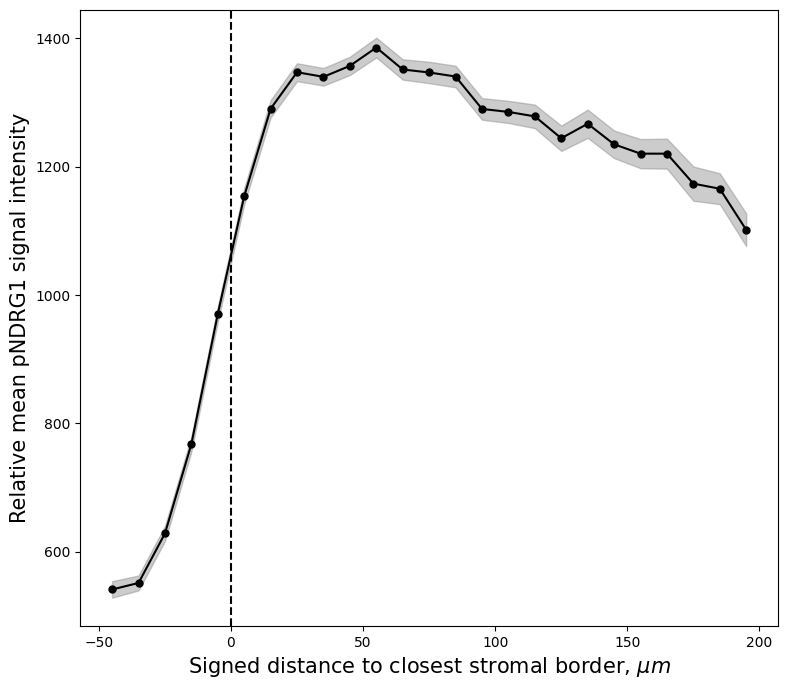

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

bin_size = 10
min_dist = -50
max_dist = 210
distance_bins_1 = pd.cut(ker488_pndrg1_647_data['Signed distance to annotation Stroma µm'], bins=range(min_dist, max_dist, bin_size), right=False)

# Calculate median intensity for each distance bin for the first set of data
median_intensity_1 = ker488_pndrg1_647_data.groupby(distance_bins_1)['pNDRG1_647: Cell: Median'].mean()

# Calculate standard error for each distance bin for the first set of data
std_error_1 = ker488_pndrg1_647_data.groupby(distance_bins_1)['pNDRG1_647: Cell: Median'].sem()

# Calculate bin midpoints for the first set of data
bin_midpoints_1 = [(bin.left + bin.right) / 2 for bin in distance_bins_1.cat.categories]

# Define bin size and create distance bins for the second set of data
distance_bins_2 = pd.cut(ker488_data['Signed distance to annotation Stroma µm'], bins=range(min_dist, max_dist, bin_size), right=False)

# Calculate median intensity for each distance bin for the second set of data
median_intensity_2 = ker488_data.groupby(distance_bins_2)['pNDRG1_647: Cell: Median'].mean()

# Calculate standard error for each distance bin for the second set of data
std_error_2 = ker488_data.groupby(distance_bins_2)['pNDRG1_647: Cell: Median'].sem()

# Calculate bin midpoints for the second set of data
bin_midpoints_2 = [(bin.left + bin.right) / 2 for bin in distance_bins_2.cat.categories]

# Calculate the difference between the two median intensities
diff_line = median_intensity_1.values - median_intensity_2.values

# Calculate the combined standard error
diff_std = np.sqrt(std_error_1**2 + std_error_2**2)

# Plotting the difference line
fig, ax1 = plt.subplots(1, 1, figsize=(9, 8))

ax1.set_ylabel(r'Relative mean pNDRG1 signal intensity', color='black', fontsize=15)
ax1.axvline(x=0, ls='--', color='black')

# Plot the gray surface representing uncertainty
ax1.fill_between(bin_midpoints_1, diff_line - diff_std, diff_line + diff_std, color='gray', alpha=0.4)

# Plot the difference line with error bars and specify different alpha values
ax1.errorbar(bin_midpoints_1, diff_line, color='black', linestyle='-', marker='o', markersize=5, alpha=1)

#ax1.set_ylim(0, 200000)

plt.xlabel(r'Signed distance to closest stromal border, $µm$', fontsize=15)
#plt.savefig("/Users/antoine/Harvard/IAC/NinaKozlova/20240412_presentation_materials/20240322_SW1990_pNDRG1_mean_interv-0to150.png", dpi=300)

plt.show()


## Bootstrap medians and standard errors of the means

/var/folders/3b/6sb_mkrj5jz7x94kf6pw1vmw0000gq/T/ipykernel_89864/1491919963.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_bootstrap_std_error_1 = ker488_pndrg1_647_data.groupby(distance_bins_1)['pNDRG1_647: Cell: MedianTotalIntensity'].apply(bootstrap_mean)
/opt/homebrew/anaconda3/envs/ninakozlova/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/homebrew/anaconda3/envs/ninakozlova/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/var/folders/3b/6sb_mkrj5jz7x94kf6pw1vmw0000gq/T/ipykernel_89864/1491919963.py:23: FutureWarning: The default of observed=False is deprecated and will b

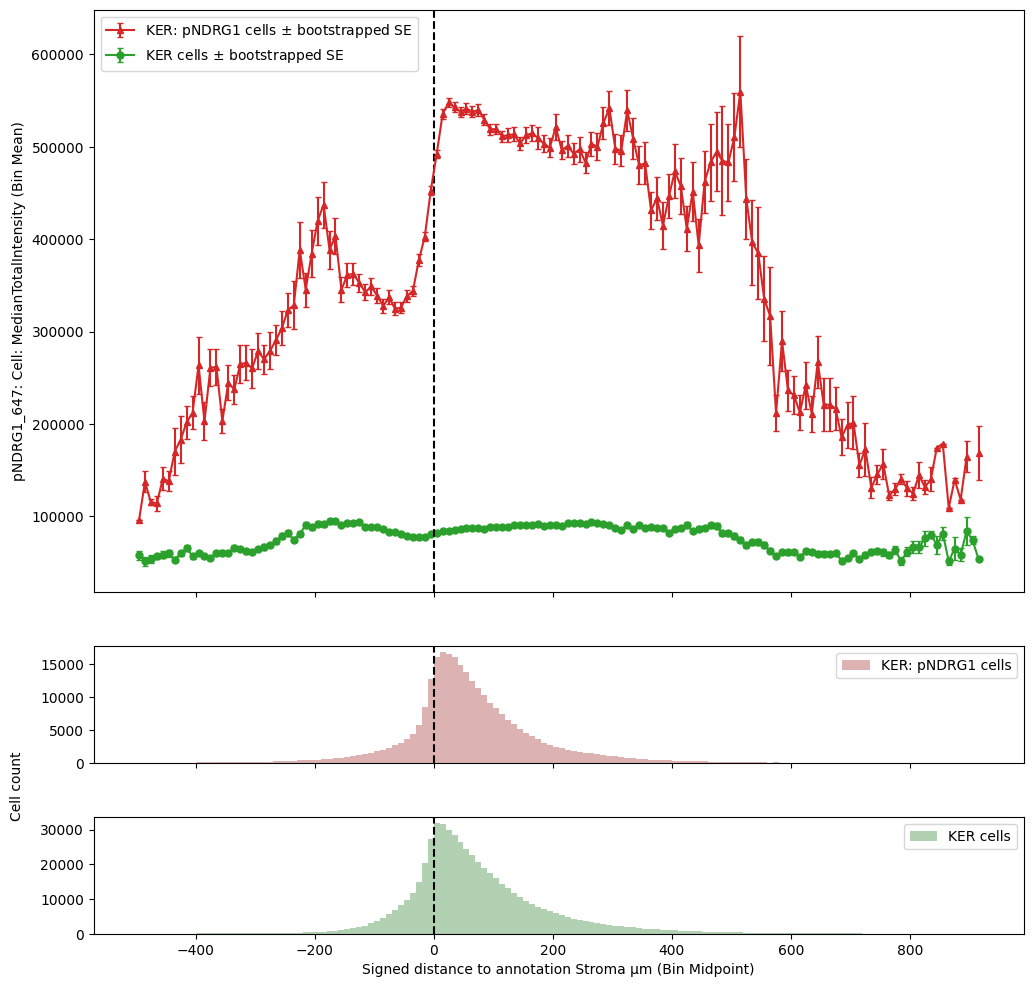

In [110]:
# Define function to calculate the standard error of the median using bootstrapping
def bootstrap_mean(data, n_bootstrap=1000):
    medians = []
    for _ in range(n_bootstrap):
        bootstrap_sample = np.random.choice(data, size=len(data), replace=True)
        medians.append(np.mean(bootstrap_sample))
    return np.mean(medians), np.std(medians, ddof=1)

# Define bin size and create distance bins for the first set of data
bin_size = 10
min_dist = int(np.min(ker488_pndrg1_647_data['Signed distance to annotation Stroma µm']))
max_dist = int(np.max(ker488_pndrg1_647_data['Signed distance to annotation Stroma µm']))
distance_bins_1 = pd.cut(ker488_pndrg1_647_data['Signed distance to annotation Stroma µm'], bins=range(min_dist, max_dist, bin_size), right=False)

# Bootstrap medians and calculate standard error for each distance bin for the first set of data
median_bootstrap_std_error_1 = ker488_pndrg1_647_data.groupby(distance_bins_1)['pNDRG1_647: Cell: MedianTotalIntensity'].apply(bootstrap_mean)

# Unpack the results to get median values and standard errors
median_values_1 = median_bootstrap_std_error_1.apply(lambda x: x[0])
std_error_1 = median_bootstrap_std_error_1.apply(lambda x: x[1])

# Calculate number of data points for each distance bin for the first set of data
num_data_points_1 = ker488_pndrg1_647_data.groupby(distance_bins_1).size()

# Calculate bin midpoints for the first set of data
bin_midpoints_1 = [(bin.left + bin.right) / 2 for bin in distance_bins_1.cat.categories]

# Plotting the first set of data
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True, gridspec_kw={'height_ratios': [5, 1, 1]}, figsize=(9, 12))
ax1.axvline(x=0, ls='--', color='black')
ax2.axvline(x=0, ls='--', color='black')
ax3.axvline(x=0, ls='--', color='black')

color = 'tab:red'
ax1.set_ylabel('pNDRG1_647: Cell: MedianTotalIntensity (Bin Mean)', color='black')
ax1.errorbar(bin_midpoints_1, median_values_1.values, yerr=std_error_1, fmt='-^', markersize=5, color=color, ecolor=color, capsize=2, label=r'KER: pNDRG1 cells $\pm$ bootstrapped SE')

# Create another y-axis for the number of data points
ax2.set_ylabel('Cell count', color='black')
ax2.yaxis.set_label_coords(-0.075, -0.2)
ax2.bar(bin_midpoints_1, num_data_points_1.values, color='darkred', width=bin_size, align='center', alpha=0.3, label='KER: pNDRG1 cells')
ax2.legend()

# Define bin size and create distance bins for the second set of data
distance_bins_2 = pd.cut(ker488_data['Signed distance to annotation Stroma µm'], bins=range(min_dist, max_dist, bin_size), right=False)

# Bootstrap medians and calculate standard error for each distance bin for the second set of data
median_bootstrap_std_error_2 = ker488_data.groupby(distance_bins_2)['pNDRG1_647: Cell: MedianTotalIntensity'].apply(bootstrap_median)

# Unpack the results to get median values and standard errors
median_values_2 = median_bootstrap_std_error_2.apply(lambda x: x[0])
std_error_2 = median_bootstrap_std_error_2.apply(lambda x: x[1])

# Calculate number of data points for each distance bin for the second set of data
num_data_points_2 = ker488_data.groupby(distance_bins_2).size()

# Calculate bin midpoints for the second set of data
bin_midpoints_2 = [(bin.left + bin.right) / 2 for bin in distance_bins_2.cat.categories]

# Plotting the second set of data
color = 'tab:green'
ax1.errorbar(bin_midpoints_2, median_values_2.values, yerr=std_error_2, fmt='-o', color=color, markersize=5, ecolor=color, capsize=2, zorder=1, label=r'KER cells $\pm$ bootstrapped SE')
ax1.legend()

ax3.bar(bin_midpoints_2, num_data_points_2.values, color='darkgreen', width=bin_size, align='center', alpha=0.3, label='KER cells')
ax3.legend()

plt.xlabel('Signed distance to annotation Stroma µm (Bin Midpoint)')
#plt.xlim([-250, 500])

plt.savefig("/Users/antoine/Harvard/IAC/NinaKozlova/20240119_SW1990_pNDRG1/Results/plots/spatial_analysis/20240321_full_spatial_median.png", dpi=300)
plt.show()


## Zoomed

/var/folders/3b/6sb_mkrj5jz7x94kf6pw1vmw0000gq/T/ipykernel_89864/201997013.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_bootstrap_std_error_1 = ker488_pndrg1_647_data.groupby(distance_bins_1)['pNDRG1_647: Cell: MedianTotalIntensity'].apply(bootstrap_mean)
/opt/homebrew/anaconda3/envs/ninakozlova/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/homebrew/anaconda3/envs/ninakozlova/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/var/folders/3b/6sb_mkrj5jz7x94kf6pw1vmw0000gq/T/ipykernel_89864/201997013.py:23: FutureWarning: The default of observed=False is deprecated and will be 

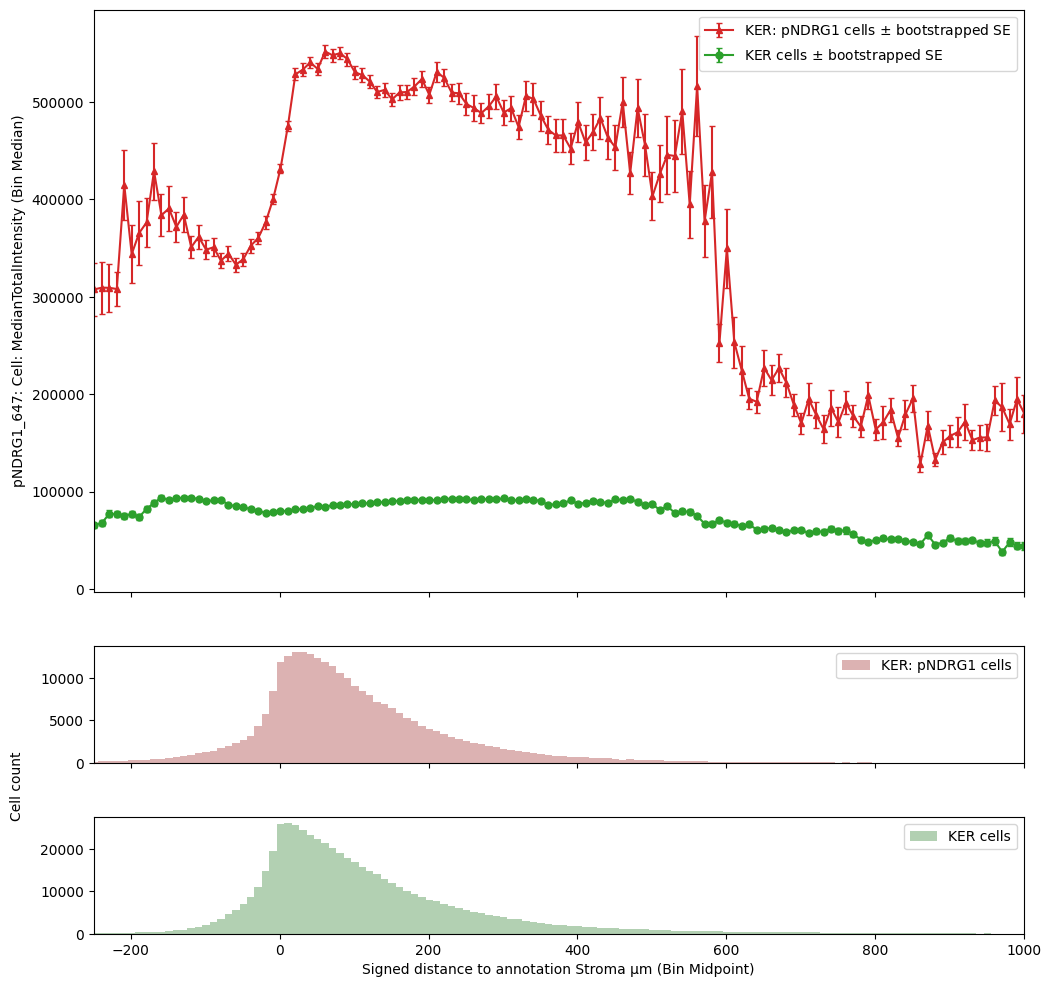

In [85]:
# Define function to calculate the standard error of the median using bootstrapping
def bootstrap_mean(data, n_bootstrap=1000):
    medians = []
    for _ in range(n_bootstrap):
        bootstrap_sample = np.random.choice(data, size=len(data), replace=True)
        medians.append(np.mean(bootstrap_sample))
    return np.mean(medians), np.std(medians, ddof=1)

# Define bin size and create distance bins for the first set of data
bin_size = 10
min_dist = int(np.min(ker488_pndrg1_647_data['Signed distance to annotation Stroma µm']))
max_dist = int(np.max(ker488_pndrg1_647_data['Signed distance to annotation Stroma µm']))
distance_bins_1 = pd.cut(ker488_pndrg1_647_data['Signed distance to annotation Stroma µm'], bins=range(min_dist, max_dist, bin_size), right=False)

# Bootstrap medians and calculate standard error for each distance bin for the first set of data
median_bootstrap_std_error_1 = ker488_pndrg1_647_data.groupby(distance_bins_1)['pNDRG1_647: Cell: MedianTotalIntensity'].apply(bootstrap_mean)

# Unpack the results to get median values and standard errors
median_values_1 = median_bootstrap_std_error_1.apply(lambda x: x[0])
std_error_1 = median_bootstrap_std_error_1.apply(lambda x: x[1])

# Calculate number of data points for each distance bin for the first set of data
num_data_points_1 = ker488_pndrg1_647_data.groupby(distance_bins_1).size()

# Calculate bin midpoints for the first set of data
bin_midpoints_1 = [(bin.left + bin.right) / 2 for bin in distance_bins_1.cat.categories]

# Plotting the first set of data
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True, gridspec_kw={'height_ratios': [5, 1, 1]}, figsize=(12, 12))

color = 'tab:red'
ax1.set_ylabel('pNDRG1_647: Cell: MedianTotalIntensity (Bin Median)', color='black')
ax1.errorbar(bin_midpoints_1, median_values_1.values, yerr=std_error_1, fmt='-^', markersize=5, color=color, ecolor=color, capsize=2, label=r'KER: pNDRG1 cells $\pm$ bootstrapped SE')

# Create another y-axis for the number of data points
ax2.set_ylabel('Cell count', color='black')
ax2.yaxis.set_label_coords(-0.075, -0.2)
ax2.bar(bin_midpoints_1, num_data_points_1.values, color='darkred', width=bin_size, align='center', alpha=0.3, label='KER: pNDRG1 cells')
ax2.legend()

# Define bin size and create distance bins for the second set of data
distance_bins_2 = pd.cut(ker488_data['Signed distance to annotation Stroma µm'], bins=range(min_dist, max_dist, bin_size), right=False)

# Bootstrap medians and calculate standard error for each distance bin for the second set of data
median_bootstrap_std_error_2 = ker488_data.groupby(distance_bins_2)['pNDRG1_647: Cell: MedianTotalIntensity'].apply(bootstrap_mean)

# Unpack the results to get median values and standard errors
median_values_2 = median_bootstrap_std_error_2.apply(lambda x: x[0])
std_error_2 = median_bootstrap_std_error_2.apply(lambda x: x[1])

# Calculate number of data points for each distance bin for the second set of data
num_data_points_2 = ker488_data.groupby(distance_bins_2).size()

# Calculate bin midpoints for the second set of data
bin_midpoints_2 = [(bin.left + bin.right) / 2 for bin in distance_bins_2.cat.categories]

# Plotting the second set of data
color = 'tab:green'
ax1.errorbar(bin_midpoints_2, median_values_2.values, yerr=std_error_2, fmt='-o', color=color, markersize=5, ecolor=color, capsize=2, zorder=1, label=r'KER cells $\pm$ bootstrapped SE')
ax1.legend()

ax3.bar(bin_midpoints_2, num_data_points_2.values, color='darkgreen', width=bin_size, align='center', alpha=0.3, label='KER cells')
ax3.legend()

plt.xlabel('Signed distance to annotation Stroma µm (Bin Midpoint)')
plt.xlim([-250, 1000])

plt.savefig("/Users/antoine/Harvard/IAC/NinaKozlova/20240119_SW1990_pNDRG1/Results/plots/spatial_analysis/20240321_zoomed_spatial_mean.png", dpi=300)
plt.show()


# NEW RUN ONLY USING MEDIANS

In [17]:
folder_path = "/Users/antoine/Harvard/IAC/NinaKozlova/20240119_SW1990_pNDRG1/Results/spatial_data/20240502_medians"

# Get a list of all CSV files in the folder
file_paths = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.endswith('.csv')]
file_paths = natsort.natsorted(file_paths)

# Specify the columns you want to load
columns_to_load = ['Class', 
                   'DAPI: Nucleus: Median', 
                   'KER_488: Cytoplasm: Median', 
                   'pNDRG1_647: Cell: Median', 
                   'FN_568: Cell: Median', 
                   'Nucleus: Area µm^2', 
                   'Signed distance to annotation Stroma µm']

# Read and filter each CSV file
dfs_ker488_pndrg1_647 = []
dfs_ker488 = []

for file_path in file_paths:
    print(file_path)
    df = pd.read_csv(file_path, usecols=columns_to_load)
    df_ker488_pndrg1_647 = df[df['Class'] == 'KER_488: pNDRG1_647']  # Filter rows by 'Class' for KER_488: pNDRG1_647
    df_ker488 = df[df['Class'] == 'KER_488']  # Filter rows by 'Class' for KER_488
    dfs_ker488_pndrg1_647.append(df_ker488_pndrg1_647)
    dfs_ker488.append(df_ker488)

# Concatenate all filtered datasets
ker488_pndrg1_647_data = pd.concat(dfs_ker488_pndrg1_647, ignore_index=True)
ker488_data = pd.concat(dfs_ker488, ignore_index=True)

/Users/antoine/Harvard/IAC/NinaKozlova/20240119_SW1990_pNDRG1/Results/spatial_data/20240502_medians/SW shC Dox GEM  #1.vsi - 20x_DAPI, FITC, TRITC, CY5_01.csv
/Users/antoine/Harvard/IAC/NinaKozlova/20240119_SW1990_pNDRG1/Results/spatial_data/20240502_medians/SW shC Dox GEM  #2.vsi - 20x_DAPI, FITC, TRITC, CY5_01.csv
/Users/antoine/Harvard/IAC/NinaKozlova/20240119_SW1990_pNDRG1/Results/spatial_data/20240502_medians/SW shC Dox GEM  #3.vsi - 20x_DAPI, FITC, TRITC, CY5_01.csv
/Users/antoine/Harvard/IAC/NinaKozlova/20240119_SW1990_pNDRG1/Results/spatial_data/20240502_medians/SW shC Dox GEM  #4.vsi - 20x_DAPI, FITC, TRITC, CY5_01.csv
/Users/antoine/Harvard/IAC/NinaKozlova/20240119_SW1990_pNDRG1/Results/spatial_data/20240502_medians/SW shC Dox GEM  #5.vsi - 20x_DAPI, FITC, TRITC, CY5_01.csv
/Users/antoine/Harvard/IAC/NinaKozlova/20240119_SW1990_pNDRG1/Results/spatial_data/20240502_medians/SW shC Dox GEM  #11.vsi - 20x_DAPI, FITC, TRITC, CY5_01.csv
/Users/antoine/Harvard/IAC/NinaKozlova/202401

In [37]:
# Define bin size and create distance bins for the first set of data
bin_size = 10
min_dist = int(np.min(ker488_pndrg1_647_data['Signed distance to annotation Stroma µm']))
max_dist = int(np.max(ker488_pndrg1_647_data['Signed distance to annotation Stroma µm']))
distance_bins_1 = pd.cut(ker488_pndrg1_647_data['Signed distance to annotation Stroma µm'], bins=range(min_dist, max_dist, bin_size), right=False)

# Calculate median intensity for each distance bin for the first set of data
median_intensity_1 = ker488_pndrg1_647_data.groupby(distance_bins_1)['pNDRG1_647: Cell: Max'].median()

# Calculate standard error for each distance bin for the first set of data
std_error_1 = ker488_pndrg1_647_data.groupby(distance_bins_1)['pNDRG1_647: Cell: Max'].sem()

# Calculate bin midpoints for the first set of data
bin_midpoints_1 = [(bin.left + bin.right) / 2 for bin in distance_bins_1.cat.categories]

# Define bin size and create distance bins for the second set of data
distance_bins_2 = pd.cut(ker488_data['Signed distance to annotation Stroma µm'], bins=range(min_dist, max_dist, bin_size), right=False)

# Calculate median intensity for each distance bin for the second set of data
median_intensity_2 = ker488_data.groupby(distance_bins_2)['pNDRG1_647: Cell: Max'].median()

# Calculate standard error for each distance bin for the second set of data
std_error_2 = ker488_data.groupby(distance_bins_2)['pNDRG1_647: Cell: Max'].sem()

# Calculate bin midpoints for the second set of data
bin_midpoints_2 = [(bin.left + bin.right) / 2 for bin in distance_bins_2.cat.categories]

# Calculate the difference between the two median intensities
diff_line = median_intensity_1.values - median_intensity_2.values

# Calculate the combined standard error
diff_std = np.sqrt(std_error_1**2 + std_error_2**2)

# Plotting the difference line
fig, ax1 = plt.subplots(1, 1, figsize=(9, 8))

ax1.set_ylabel(r'pNDRG1 signal intensity', color='black', fontsize=15)
ax1.axvline(x=0, ls='--', color='black')

# Plot the gray surface representing uncertainty
ax1.fill_between(bin_midpoints_1, diff_line - diff_std, diff_line + diff_std, color='gray', alpha=0.4)

# Plot the difference line with error bars and specify different alpha values
ax1.errorbar(bin_midpoints_1, diff_line, color='black', linestyle='-', marker='o', markersize=5, alpha=1)

#ax1.set_ylim(0, 200000)

plt.xlabel(r'Signed distance to closest stromal border, $µm$', fontsize=15)
#plt.savefig("/Users/antoine/Harvard/IAC/NinaKozlova/20240412_presentation_materials/20240322_SW1990_pNDRG1_mean_interv-0to150.png", dpi=300)

plt.show()


NameError: name 'ker488_pndrg1_647_data' is not defined

## ML classifiers

In [53]:
# ML-based classification

folder_path = "/Users/antoine/Harvard/IAC/NinaKozlova/20240119_SW1990_pNDRG1/Results/20240607_ML_RF_intensity_refined"

# Get a list of all CSV files in the folder
file_paths = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.endswith('.csv')]
file_paths = natsort.natsorted(file_paths)

# Specify the columns you want to load
columns_to_load = ['Classification', 
                   'Object ID', 
                   'DAPI: Nucleus: Median',
                   'KER_488: Cytoplasm: Median', 
                   'pNDRG1_647: Cell: Median', 
                   'pNDRG1_647: Cell: Max', 
                   'FN_568: Cell: Median', 
                   'Nucleus: Area µm^2', 
                   'Signed distance to annotation Stroma µm']

# Read and filter each CSV file
dfs_ker488_pndrg1_647 = []
dfs_ker488 = []
all = []

for file_path in file_paths:
    print(file_path)
    df = pd.read_csv(file_path, usecols=columns_to_load)
    print(len(df))
    df_ker488_pndrg1_647 = df[df['Classification'] == 'pNDRG1+: KER+']  # Filter rows by 'Class' for KER_488: pNDRG1_647
    df_ker488 = df[df['Classification'] == 'pNDRG1-: KER+']  # Filter rows by 'Class' for KER_488
    dfs_ker488_pndrg1_647.append(df_ker488_pndrg1_647)
    dfs_ker488.append(df_ker488)
    all.append(df)

# Concatenate all filtered datasets
ker_pndrg_data = pd.concat(dfs_ker488_pndrg1_647, ignore_index=True)
ker_data = pd.concat(dfs_ker488, ignore_index=True)
all_ML = pd.concat(all, ignore_index=True)

/Users/antoine/Harvard/IAC/NinaKozlova/20240119_SW1990_pNDRG1/Results/20240607_ML_RF_intensity_refined/SW shC Dox GEM  #1.vsi - 20x_DAPI, FITC, TRITC, CY5_01.csv
245772
/Users/antoine/Harvard/IAC/NinaKozlova/20240119_SW1990_pNDRG1/Results/20240607_ML_RF_intensity_refined/SW shC Dox GEM  #2.vsi - 20x_DAPI, FITC, TRITC, CY5_01.csv
96187
/Users/antoine/Harvard/IAC/NinaKozlova/20240119_SW1990_pNDRG1/Results/20240607_ML_RF_intensity_refined/SW shC Dox GEM  #3.vsi - 20x_DAPI, FITC, TRITC, CY5_01.csv
285376
/Users/antoine/Harvard/IAC/NinaKozlova/20240119_SW1990_pNDRG1/Results/20240607_ML_RF_intensity_refined/SW shC Dox GEM  #4.vsi - 20x_DAPI, FITC, TRITC, CY5_01.csv
472106
/Users/antoine/Harvard/IAC/NinaKozlova/20240119_SW1990_pNDRG1/Results/20240607_ML_RF_intensity_refined/SW shC Dox GEM  #5.vsi - 20x_DAPI, FITC, TRITC, CY5_01.csv
121660
/Users/antoine/Harvard/IAC/NinaKozlova/20240119_SW1990_pNDRG1/Results/20240607_ML_RF_intensity_refined/SW shC Dox GEM  #11.vsi - 20x_DAPI, FITC, TRITC, CY5_

/var/folders/3b/6sb_mkrj5jz7x94kf6pw1vmw0000gq/T/ipykernel_84509/3910145277.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_intensity_1 = ker_pndrg_data.groupby(distance_bins_1)['pNDRG1_647: Cell: Max'].median()
/var/folders/3b/6sb_mkrj5jz7x94kf6pw1vmw0000gq/T/ipykernel_84509/3910145277.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  std_error_1 = ker_pndrg_data.groupby(distance_bins_1)['pNDRG1_647: Cell: Max'].sem()
/var/folders/3b/6sb_mkrj5jz7x94kf6pw1vmw0000gq/T/ipykernel_84509/3910145277.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a fut

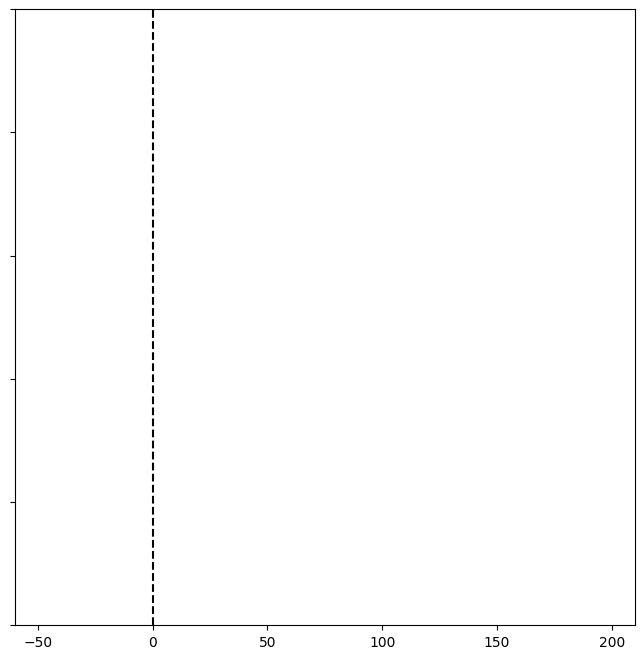

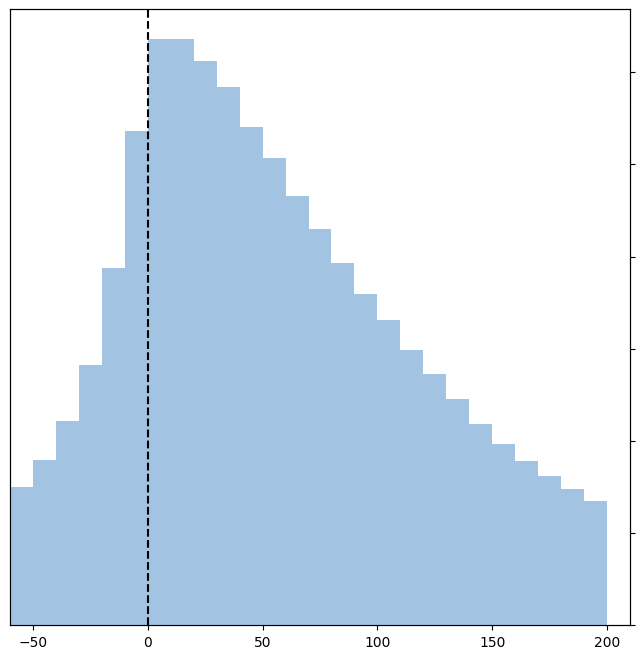

In [57]:
# Define bin size and create distance bins for the first set of data
bin_size = 10
min_dist = -60
max_dist = 210

output_path = "/Users/antoine/Harvard/IAC/NinaKozlova/20240119_SW1990_pNDRG1/Results/20240606_ML/plots"

# Distance bins and calculations for the third set of data
distance_bins_1 = pd.cut(ker_pndrg_data['Signed distance to annotation Stroma µm'], bins=range(min_dist, max_dist, bin_size), right=False)
median_intensity_1 = ker_pndrg_data.groupby(distance_bins_1)['pNDRG1_647: Cell: Max'].median()
std_error_1 = ker_pndrg_data.groupby(distance_bins_1)['pNDRG1_647: Cell: Max'].sem()
bin_midpoints_1 = [(bin.left + bin.right) / 2 for bin in distance_bins_1.cat.categories]
num_data_points_1 = ker_pndrg_data.groupby(distance_bins_1).size()

# Distance bins and calculations for the fourth set of data
distance_bins_2 = pd.cut(ker_data['Signed distance to annotation Stroma µm'], bins=range(min_dist, max_dist, bin_size), right=False)
median_intensity_2 = ker_data.groupby(distance_bins_2)['pNDRG1_647: Cell: Max'].median()
std_error_2 = ker_data.groupby(distance_bins_2)['pNDRG1_647: Cell: Max'].sem()
bin_midpoints_2 = [(bin.left + bin.right) / 2 for bin in distance_bins_2.cat.categories]
num_data_points_2 = ker_data.groupby(distance_bins_2).size()

# Combine the data from both groups
combined_count = num_data_points_1.values + num_data_points_2.values

# Calculate the difference between the two median intensities
diff_line = median_intensity_1.values - median_intensity_2.values
# Calculate the combined standard error
diff_std = np.sqrt((std_error_1)**2 + (std_error_2)**2)

color = "#83AFD8"

# plotting
fig, ax1 = plt.subplots(figsize=(8, 8))

# Calculate the aspect ratio based on the data limits
x_min, x_max = min_dist, max_dist
#y_min, y_max = 0, 1000

# Plot the data
ax1.fill_between(bin_midpoints_1, diff_line - diff_std, diff_line + diff_std, color="grey", alpha=0.75)
ax1.errorbar(bin_midpoints_1, diff_line, color='black', linestyle='-', marker='o', markersize=10, alpha=1, linewidth=2.5)
ax1.tick_params(axis='y', which='both', labelleft=False, labelright=False)

# Adjust other plot settings as needed
ax1.tick_params(axis='y', labelcolor='black')
ax1.set_xlim([x_min, x_max])
ax1.set_ylim([y_min, y_max])
plt.axvline(x=0, ls='--', color='black')
# Save and display the plot
plt.savefig(f"{output_path}/pNDRG1_signal_without_axis_labels", dpi=300, transparent=True)
plt.show()
plt.close()

# plotting
fig, ax1 = plt.subplots(figsize=(8, 8))
ax2 = ax1.twinx()
ax1.tick_params(axis='y', which='both', left=False, labelleft=False, labelright=False)

# Plot data on ax2
ax2.bar(bin_midpoints_1, combined_count, color=color, width=bin_size, align='center', alpha=0.75, label='Ki67+')
ax2.tick_params(axis='y', labelcolor='black', left=False, labelleft=False, labelright=False)
ax2.set_xlim(ax1.get_xlim())

# Adjust other plot settings as needed
ax2.set_xlabel(r'Signed distance to closest stromal border, $µm$', color='black', fontsize=15)
plt.axvline(x=0, ls='--', color='black')
plt.xlim([min_dist, max_dist])

# Save and display the plot
plt.savefig(f"{output_path}/pNDRG1_cell_count_without_axis_labels", dpi=300, transparent=True)
plt.show()
plt.close()

/var/folders/3b/6sb_mkrj5jz7x94kf6pw1vmw0000gq/T/ipykernel_84509/138891334.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_intensity_1 = ker_pndrg_data.groupby(distance_bins_1)['pNDRG1_647: Cell: Max'].median()
/var/folders/3b/6sb_mkrj5jz7x94kf6pw1vmw0000gq/T/ipykernel_84509/138891334.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  std_error_1 = ker_pndrg_data.groupby(distance_bins_1)['pNDRG1_647: Cell: Max'].sem()
/var/folders/3b/6sb_mkrj5jz7x94kf6pw1vmw0000gq/T/ipykernel_84509/138891334.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future

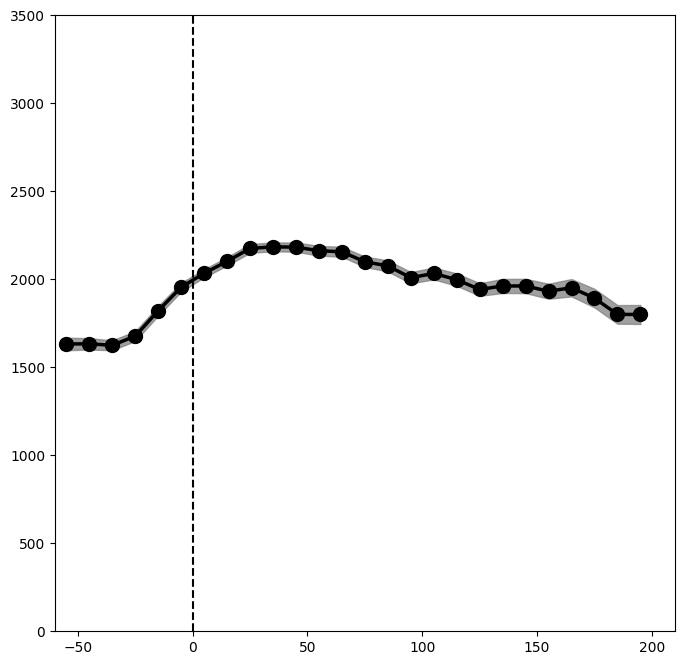

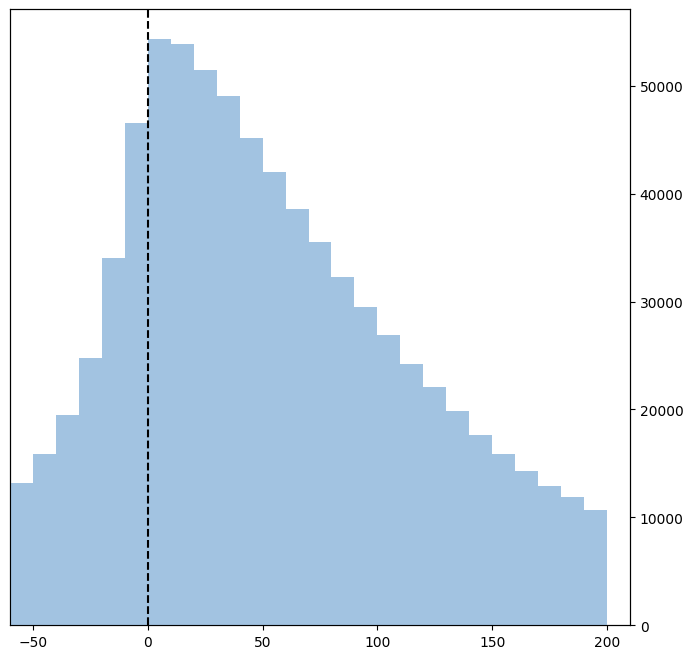

In [40]:
# Define bin size and create distance bins for the first set of data
bin_size = 10
min_dist = -60
max_dist = 210

output_path = "/Users/antoine/Harvard/IAC/NinaKozlova/20240119_SW1990_pNDRG1/Results/20240606_ML/plots"

# Distance bins and calculations for the third set of data
distance_bins_1 = pd.cut(ker_pndrg_data['Signed distance to annotation Stroma µm'], bins=range(min_dist, max_dist, bin_size), right=False)
median_intensity_1 = ker_pndrg_data.groupby(distance_bins_1)['pNDRG1_647: Cell: Max'].median()
std_error_1 = ker_pndrg_data.groupby(distance_bins_1)['pNDRG1_647: Cell: Max'].sem()
bin_midpoints_1 = [(bin.left + bin.right) / 2 for bin in distance_bins_1.cat.categories]
num_data_points_1 = ker_pndrg_data.groupby(distance_bins_1).size()

# Distance bins and calculations for the fourth set of data
distance_bins_2 = pd.cut(ker_data['Signed distance to annotation Stroma µm'], bins=range(min_dist, max_dist, bin_size), right=False)
median_intensity_2 = ker_data.groupby(distance_bins_2)['pNDRG1_647: Cell: Max'].median()
std_error_2 = ker_data.groupby(distance_bins_2)['pNDRG1_647: Cell: Max'].sem()
bin_midpoints_2 = [(bin.left + bin.right) / 2 for bin in distance_bins_2.cat.categories]
num_data_points_2 = ker_data.groupby(distance_bins_2).size()

# Combine the data from both groups
combined_count = num_data_points_1.values + num_data_points_2.values

# Calculate the difference between the two median intensities
diff_line = median_intensity_1.values - median_intensity_2.values
# Calculate the combined standard error
diff_std = np.sqrt((std_error_1)**2 + (std_error_2)**2)

color = "#83AFD8"

# plotting
fig, ax1 = plt.subplots(figsize=(8, 8))

# Calculate the aspect ratio based on the data limits
x_min, x_max = min_dist, max_dist
y_min, y_max = 0, 3500

# Plot the data
ax1.fill_between(bin_midpoints_1, diff_line - diff_std, diff_line + diff_std, color="grey", alpha=0.75)
ax1.errorbar(bin_midpoints_1, diff_line, color='black', linestyle='-', marker='o', markersize=10, alpha=1, linewidth=2.5)
ax1.tick_params(axis='y', which='both', labelright=False)

# Adjust other plot settings as needed
ax1.tick_params(axis='y', labelcolor='black')
ax1.set_xlim([x_min, x_max])
ax1.set_ylim([y_min, y_max])
plt.axvline(x=0, ls='--', color='black')
# Save and display the plot
plt.savefig(f"{output_path}/pNDRG1_signal_with_axis_labels", dpi=300, transparent=True)
plt.show()
plt.close()

# plotting
fig, ax1 = plt.subplots(figsize=(8, 8))
ax2 = ax1.twinx()
ax1.tick_params(axis='y', which='both', left=False, labelleft=False)

# Plot data on ax2
ax2.bar(bin_midpoints_1, combined_count, color=color, width=bin_size, align='center', alpha=0.75, label='Ki67+')
ax2.tick_params(axis='y', labelcolor='black', left=False, labelleft=False)
ax2.set_xlim(ax1.get_xlim())

# Adjust other plot settings as needed
ax2.set_xlabel(r'Signed distance to closest stromal border, $µm$', color='black', fontsize=15)
plt.axvline(x=0, ls='--', color='black')
plt.xlim([min_dist, max_dist])

# Save and display the plot
plt.savefig(f"{output_path}/pNDRG1_cell_count_with_axis_labels", dpi=300, transparent=True)
plt.show()
plt.close()

/var/folders/3b/6sb_mkrj5jz7x94kf6pw1vmw0000gq/T/ipykernel_84509/3477052452.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_intensity_1 = ker_pndrg_data.groupby(distance_bins_1)['pNDRG1_647: Cell: Median'].median()
/var/folders/3b/6sb_mkrj5jz7x94kf6pw1vmw0000gq/T/ipykernel_84509/3477052452.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  std_error_1 = ker_pndrg_data.groupby(distance_bins_1)['pNDRG1_647: Cell: Median'].sem()
/var/folders/3b/6sb_mkrj5jz7x94kf6pw1vmw0000gq/T/ipykernel_84509/3477052452.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in

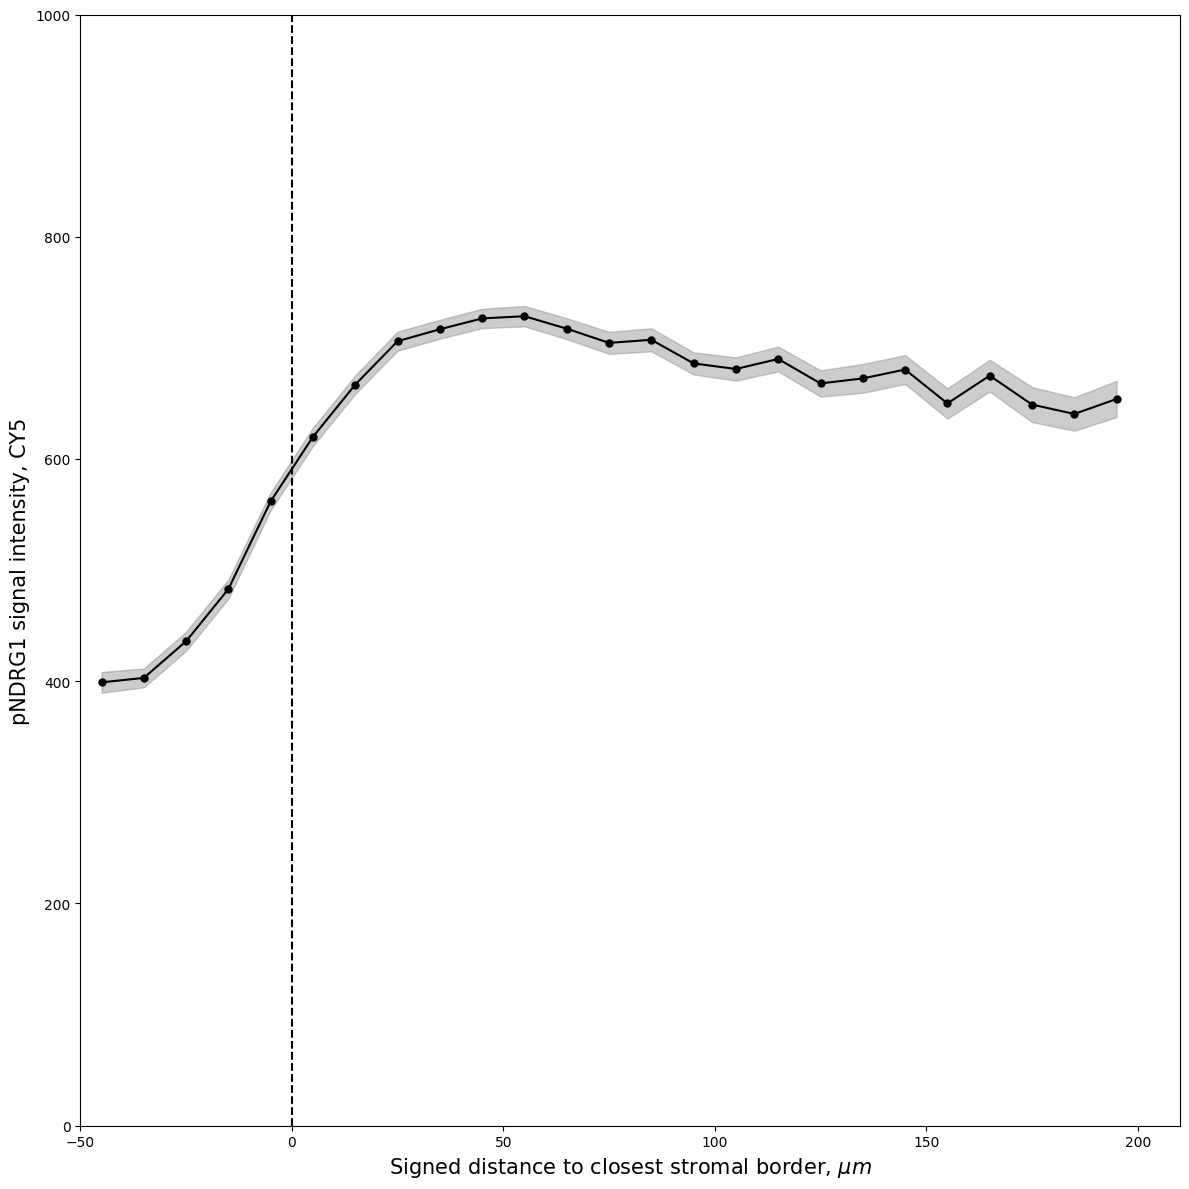

In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define bin size and create distance bins for the first set of data
bin_size = 10
min_dist = -50
max_dist = 210

output_path = "/Users/antoine/Harvard/IAC/NinaKozlova/Submission/Preliminary/spatial_plots/8x8"

# Distance bins and calculations for the third set of data
distance_bins_1 = pd.cut(ker_pndrg_data['Signed distance to annotation Stroma µm'], bins=range(min_dist, max_dist, bin_size), right=False)
median_intensity_1 = ker_pndrg_data.groupby(distance_bins_1)['pNDRG1_647: Cell: Median'].median()
std_error_1 = ker_pndrg_data.groupby(distance_bins_1)['pNDRG1_647: Cell: Median'].sem()
bin_midpoints_1 = [(bin.left + bin.right) / 2 for bin in distance_bins_1.cat.categories]
num_data_points_1 = ker_pndrg_data.groupby(distance_bins_1).size()

# Distance bins and calculations for the fourth set of data
distance_bins_2 = pd.cut(ker_data['Signed distance to annotation Stroma µm'], bins=range(min_dist, max_dist, bin_size), right=False)
median_intensity_2 = ker_data.groupby(distance_bins_2)['pNDRG1_647: Cell: Median'].median()
std_error_2 = ker_data.groupby(distance_bins_2)['pNDRG1_647: Cell: Median'].sem()
bin_midpoints_2 = [(bin.left + bin.right) / 2 for bin in distance_bins_2.cat.categories]
num_data_points_2 = ker_data.groupby(distance_bins_2).size()

# Combine the data from both groups
combined_count = num_data_points_1.values + num_data_points_2.values

# Calculate the difference between the two median intensities
diff_line = median_intensity_1.values - median_intensity_2.values
# Calculate the combined standard error
diff_std = np.sqrt(std_error_1**2 + std_error_2**2)

plt.figure(figsize=(12, 12))
plt.xlim([min_dist, max_dist])
plt.ylabel(r'pNDRG1 signal intensity, CY5', color='black', fontsize=15)
plt.axvline(x=0, ls='--', color='black')
plt.fill_between(bin_midpoints_1, diff_line - diff_std, diff_line + diff_std, color='gray', alpha=0.4)
plt.errorbar(bin_midpoints_1, diff_line, color='black', linestyle='-', marker='o', markersize=5, alpha=1)
plt.ylim([0, 1000])
plt.xlabel(r'Signed distance to closest stromal border, $µm$', color='black', fontsize=15)
plt.tight_layout()
#plt.savefig(f"{output_path}/spatial_SW1990_shC_pNDRG1", dpi=300, transparent=True)
plt.show()
plt.close()

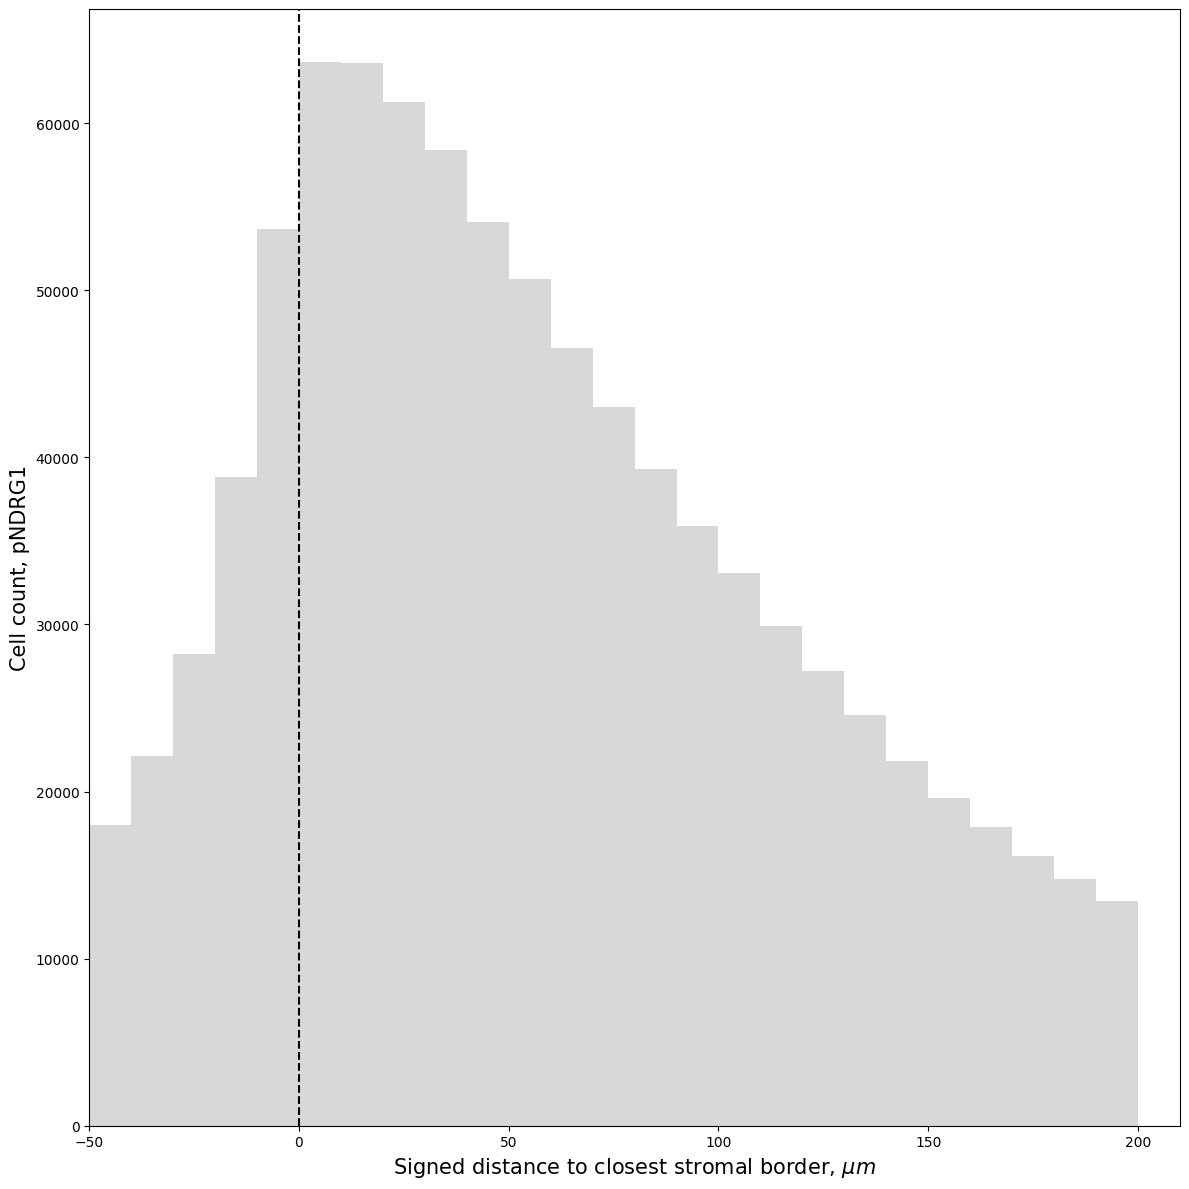

In [79]:

plt.figure(figsize=(12, 12))
plt.xlim([min_dist, max_dist])
plt.ylabel(r'Cell count, pNDRG1', color='black', fontsize=15)
plt.axvline(x=0, ls='--', color='black')
plt.bar(bin_midpoints_1, combined_count, color='grey', width=bin_size, align='center', alpha=0.3, label='Ki67+') # color='#f781bf',
#plt.bar(bin_midpoints_2, num_data_points_2.values, color='#377eb8', width=bin_size, align='center', alpha=0.3, label='Ki67-')
#plt.ylim([0, None])
plt.xlabel(r'Signed distance to closest stromal border, $µm$', color='black', fontsize=15)
plt.tight_layout()
#plt.savefig(f"{output_path}/cell_count_SW1990_shC_pNDRG1", dpi=300, transparent=True)
plt.show()
plt.close()